In [2]:

import pickle 

with open("cdr_epitope_residues_pairs.pkl","rb") as f:
    table2= pickle.load(f)

In [3]:
table2.head()

,idcode,chainID,chain_type,cdr,cdr_seq,cdr_begin,cdr_end,cdr_atoms,epitope_atoms,epitope_residues,close_atoms
0,1mhp,X,H,1,GFTFSRY,26,32,"[6409, 6410, 6411, 6412, 6413, 6414, 6415, 641...","[4833, 4834, 4835, 4836, 4837, 4838, 4839, 484...","[ 160 , 160 , 160 , 160 , 160 , 160 , 16...","[(SER, 30, TYR, 160), (SER, 30, TYR, 160), (SE..."
1,1mhp,X,H,2,SGGGH,52,56,"[6620, 6621, 6622, 6623, 6624, 6625, 6626, 662...","[4809, 4810, 4811, 4812, 4813, 4814, 4815, 483...","[ 157 , 157 , 157 , 157 , 157 , 157 , 15...","[(SER, 52, ASN, 157), (SER, 52, ASN, 157), (SE..."
2,1mhp,X,H,3,GFGDGGYFDV,98,107,"[6988, 6989, 6990, 6991, 6992, 6993, 6994, 699...","[4803, 4804, 4805, 4806, 4807, 4808, 4809, 481...","[ 156 , 156 , 156 , 156 , 156 , 157 , 15...","[(PHE, 99, LEU, 294), (PHE, 99, LEU, 294), (PH..."
3,1mhp,Y,K,1,SASSSVNHMF,24,33,"[7297, 7298, 7299, 7300, 7301, 7302, 7303, 730...","[5612, 5616, 5620, 5621, 5622, 5623, 5624, 562...","[ 259 , 260 , 261 , 261 , 261 , 261 , 26...","[(VAL, 29, TYR, 264), (VAL, 29, TYR, 264), (VA..."
4,1mhp,Y,K,2,LTSNLAS,49,55,"[7505, 7506, 7507, 7508, 7509, 7510, 7511, 751...","[5610, 5612, 5903]","[ 259 , 259 , 294 ]","[(LEU, 49, GLU, 259), (LEU, 49, GLU, 259), (LE..."


In [7]:
set(table2["close_atoms"][0])

{('ARG', 31, 'ARG', 291), ('ARG', 31, 'TYR', 160), ('SER', 30, 'TYR', 160)}

In [52]:
pair_atom = list(table2["close_atoms"].values)

In [56]:
list(set(pair_atom[0]))

[('ARG', 31, 'ARG', 291), ('ARG', 31, 'TYR', 160), ('SER', 30, 'TYR', 160)]

In [58]:
def deal_old
old_list = [('ARG', 31, 'ARG', 291), ('ARG', 31, 'TYR', 160), ('SER', 30, 'TYR', 160)]

new_list = [(f"{tup[0]}{tup[1]}", f"{tup[2]}{tup[3]}") for tup in old_list]

print(new_list)

[('ARG31', 'ARG291'), ('ARG31', 'TYR160'), ('SER30', 'TYR160')]


In [ ]:
for each_set in pair_atom:
    lst = set(each_set)
    new_lst = 
    

In [3]:
import scipy.spatial

import concurrent.futures
import numpy as np
import pandas as pd
from tqdm.notebook import tqdm
import itertools
import scipy
import math
import torch
import gemmi
from torch.utils.data import Dataset, DataLoader, RandomSampler, random_split
from pathlib import Path

path= Path("/home/xxie92/Downloads/igvae_dataset/all_padded_pdbs/")

In [8]:
from abnumber import Chain

# no_index version
def get_h1_h2_h3(seq):
    try:
        chain = Chain(seq, scheme='chothia')
        return chain.cdr1_seq, chain.cdr2_seq, chain.cdr3_seq
    except:
        print(i)

In [11]:
d = {}
for p in tqdm(path.iterdir()):
    #print(p.stem)
    try:
        name = p.stem[:4]
        if name not in d.keys():
            d[name]=[]
        seq = get_seq(str(p))
        d[name].append((p.stem,seq,get_h1_h2_h3(seq)))
    except:
        pass

0it [00:00, ?it/s]

In [7]:
# get seq from pdb

import gemmi


def get_seq(p):
    st = gemmi.read_structure(str(p))
    #st.setup_entities()  
    polymer = st[0][0].get_polymer()
    sequence = gemmi.one_letter_code(polymer)
    return sequence



In [12]:
len(d)

3319

In [13]:
len(set(table2["idcode"]))

2586

In [17]:
c = 0
not_show_lst = []
for k in list(set(table2["idcode"])):
    big_k = k.upper()
    if big_k not in d.keys():
        not_show_lst.append(big_k)
        c+=1

In [21]:
c

1461

In [18]:
not_show_lst

['7FJS',
 '7TPJ',
 '7KMH',
 '6WPT',
 '6PCU',
 '7N01',
 '6VYV',
 '7Q0I',
 '7WCH',
 '7X6O',
 '7LU9',
 '6UTA',
 '7E9O',
 '7LF2',
 '7LY2',
 '7A3N',
 '7PQZ',
 '6WTY',
 '7RD5',
 '6WIZ',
 '7O7F',
 '7MKM',
 '7SU1',
 '7D3M',
 '7LBG',
 '7EC5',
 '7CYH',
 '6NF2',
 '7SYY',
 '7WLW',
 '7SFV',
 '6JHQ',
 '7ZWI',
 '7MUB',
 '7K8U',
 '7LI6',
 '7N3I',
 '7SO7',
 '7R8L',
 '7BBJ',
 '7TER',
 '7KN6',
 '7MJS',
 '7LKH',
 '8F6E',
 '7X92',
 '6Q0H',
 '6LHP',
 '7NDB',
 '7LRS',
 '6VMJ',
 '6XY2',
 '6WIT',
 '7LF7',
 '7M2I',
 '7LJ4',
 '8DKM',
 '6VRL',
 '7KFY',
 '7N3C',
 '7KN3',
 '1ADQ',
 '7T0Z',
 '7BEL',
 '7C61',
 '8DXS',
 '7WON',
 '8DUA',
 '7DM2',
 '7S0E',
 '7LFB',
 '7MJJ',
 '7UGP',
 '7EJ5',
 '7R87',
 '7JV6',
 '6WN1',
 '7CTH',
 '7SK3',
 '7WVL',
 '7AMP',
 '7QEZ',
 '4UIH',
 '7X49',
 '3S88',
 '6XZW',
 '7C2L',
 '7UE0',
 '7WPE',
 '8DIM',
 '7A3U',
 '6XPZ',
 '6M3Z',
 '6J6Y',
 '6ERX',
 '7K8Z',
 '7X26',
 '8E7M',
 '7WO4',
 '6PZW',
 '7T76',
 '7OX1',
 '7X2I',
 '7CW0',
 '6VC9',
 '7KPB',
 '7KMG',
 '7EBZ',
 '7CVS',
 '7U8L',
 '3IXX',
 

In [19]:
d.keys()

dict_keys(['5I1L', '1KIQ', '5YY5', '5XKU', '2R8S', '5HI3', '5U7O', '6GG0', '4O58', '6FOE', '2YC1', '3EO1', '4KUZ', '1IGT', '1XF2', '1FJ1', '4R2G', '3EJY', '1NGP', '4YFL', '3MLZ', '4UT6', '2A6D', '3BPC', '2VXV', '5UDC', '5LMJ', '1N64', '5MVJ', '2VDL', '2A77', '4WFH', '4XBP', '4XAK', '3WHE', '2IQ9', '4Y5V', '2R2B', '4R4F', '1EMT', '1F6L', '1WZ1', '5BK5', '4XVU', '4S2S', '4S1D', '3LEX', '6I6J', '5FUC', '15C8', '4BKL', '3V4U', '1QKZ', '5I1D', '4LST', '6DKJ', '6BT3', '4U1G', '3KYM', '6MUI', '5VIY', '6NNF', '5GGR', '2C1P', '3MLX', '5O4G', '5A16', '5F6H', '4EDX', '4HWE', '4R8W', '4M62', '6MYY', '4KMT', '4TPR', '6CE0', '6H3U', '1GC1', '3VE0', '5WK2', '1OTT', '4LBE', '5W3M', '4M6O', '1IGY', '1BGX', '3TJE', '4F37', '2F5B', '3J2Z', '1LGV', '4NC1', '5U3L', '4J1U', '2I9L', '4AM0', '2A0L', '4HZL', '1IQD', '3EYO', '5NUZ', '5VL2', '6J7W', '4MA1', '6DC7', '1DEE', '4DKE', '5JW4', '5VEB', '6CDE', '4XNM', '6BAE', '3QEH', '4M61', '5ZIA', '5W9J', '35C8', '1MCC', '4YHM', '3ULU', '6MTS', '4QHL', '3RVX', '1UA6

In [22]:
len(d)

3319

In [23]:
len(set(table2["idcode"]))

2586

In [24]:
list1 = [1, 2, 3, 4, 5]
list2 = [3, 4, 5, 6, 7]

overlap = set(list1).intersection(set(list2))

print(overlap)  

{3, 4, 5}


In [32]:
list1 = list(d.keys())
list2 = list(table2["idcode"].values)

overlap = set(map(str.lower, list1)).intersection(set(list2))

print(overlap)  

{'4bz2', '6c6y', '6bae', '5d72', '3a6c', '6did', '5oca', '4u0r', '4f3f', '6i04', '2atk', '2ht2', '6i8s', '4fg6', '3wlw', '4jm2', '1qgc', '4om1', '4lvo', '2iff', '6njm', '4kro', '2yc1', '6dzl', '5mev', '3w2d', '1ic7', '1kiq', '3gjf', '2dqj', '3lzf', '3fb6', '5dwu', '5c0n', '1yy9', '4wuu', '5xhv', '3rvx', '5f96', '5w4l', '4dag', '3tt3', '5hd8', '6j5d', '5j3h', '6att', '4np4', '6b70', '5bvp', '6o39', '6orq', '1ob1', '1n8z', '2vit', '4jqi', '3fmg', '5tqq', '4ot1', '3wfc', '3idx', '5dhz', '5wob', '5c8j', '4om0', '6h5n', '4ij3', '3f7y', '4rqs', '6csf', '1uac', '3p0y', '3uaj', '4kvn', '3c09', '3w13', '3o2d', '4p59', '4xph', '5fhc', '1j1p', '6flc', '4z7n', '5h35', '4okv', '5th9', '3ncy', '1nbz', '5f3h', '1lk3', '6ocb', '5j3d', '6n4r', '2r0k', '1fbi', '4wfe', '6mu7', '5a3i', '3zdy', '1zwi', '5vk6', '4kka', '3g04', '5hi3', '6ce0', '6cse', '6ban', '5occ', '4jzj', '1p2c', '2jel', '2vir', '2ny7', '6mtn', '1xgt', '1kip', '5k9k', '5do2', '6mhr', '5hbt', '3rhw', '5d93', '1xct', '1nfd', '5o14', '4rfo',

In [26]:
list1

['5I1L',
 '1KIQ',
 '5YY5',
 '5XKU',
 '2R8S',
 '5HI3',
 '5U7O',
 '6GG0',
 '4O58',
 '6FOE',
 '2YC1',
 '3EO1',
 '4KUZ',
 '1IGT',
 '1XF2',
 '1FJ1',
 '4R2G',
 '3EJY',
 '1NGP',
 '4YFL',
 '3MLZ',
 '4UT6',
 '2A6D',
 '3BPC',
 '2VXV',
 '5UDC',
 '5LMJ',
 '1N64',
 '5MVJ',
 '2VDL',
 '2A77',
 '4WFH',
 '4XBP',
 '4XAK',
 '3WHE',
 '2IQ9',
 '4Y5V',
 '2R2B',
 '4R4F',
 '1EMT',
 '1F6L',
 '1WZ1',
 '5BK5',
 '4XVU',
 '4S2S',
 '4S1D',
 '3LEX',
 '6I6J',
 '5FUC',
 '15C8',
 '4BKL',
 '3V4U',
 '1QKZ',
 '5I1D',
 '4LST',
 '6DKJ',
 '6BT3',
 '4U1G',
 '3KYM',
 '6MUI',
 '5VIY',
 '6NNF',
 '5GGR',
 '2C1P',
 '3MLX',
 '5O4G',
 '5A16',
 '5F6H',
 '4EDX',
 '4HWE',
 '4R8W',
 '4M62',
 '6MYY',
 '4KMT',
 '4TPR',
 '6CE0',
 '6H3U',
 '1GC1',
 '3VE0',
 '5WK2',
 '1OTT',
 '4LBE',
 '5W3M',
 '4M6O',
 '1IGY',
 '1BGX',
 '3TJE',
 '4F37',
 '2F5B',
 '3J2Z',
 '1LGV',
 '4NC1',
 '5U3L',
 '4J1U',
 '2I9L',
 '4AM0',
 '2A0L',
 '4HZL',
 '1IQD',
 '3EYO',
 '5NUZ',
 '5VL2',
 '6J7W',
 '4MA1',
 '6DC7',
 '1DEE',
 '4DKE',
 '5JW4',
 '5VEB',
 '6CDE',
 '4XNM',
 

In [31]:
list2

['1mhp',
 '1mhp',
 '1mhp',
 '1mhp',
 '1mhp',
 '1mhp',
 '7sue',
 '7sue',
 '7sue',
 '7sue',
 '7sue',
 '7sue',
 '7sue',
 '7sue',
 '7sue',
 '7sue',
 '7sue',
 '7sue',
 '7sue',
 '7sue',
 '7sue',
 '7sue',
 '7sue',
 '7sue',
 '5js9',
 '5js9',
 '5js9',
 '5js9',
 '5js9',
 '5js9',
 '5js9',
 '5js9',
 '5js9',
 '5js9',
 '5js9',
 '5js9',
 '7su1',
 '7su1',
 '7su1',
 '7su1',
 '7su1',
 '7su1',
 '7su0',
 '7su0',
 '7su0',
 '7su0',
 '7su0',
 '7su0',
 '6q20',
 '6q20',
 '6q20',
 '6q20',
 '6q20',
 '6q20',
 '8fe3',
 '8fe3',
 '8fe3',
 '8fe3',
 '8fe3',
 '8fe3',
 '8fe3',
 '8fe3',
 '8fe3',
 '8fe3',
 '8fe3',
 '8fe3',
 '2atk',
 '2atk',
 '2atk',
 '2atk',
 '2atk',
 '2atk',
 '8fe4',
 '8fe4',
 '8fe4',
 '8fe4',
 '8fe4',
 '8fe4',
 '5jsa',
 '5jsa',
 '5jsa',
 '5jsa',
 '5jsa',
 '5jsa',
 '5jsa',
 '5jsa',
 '5jsa',
 '5jsa',
 '5jsa',
 '5jsa',
 '7po5',
 '7po5',
 '7po5',
 '7po5',
 '7po5',
 '7po5',
 '7kra',
 '7kra',
 '7kra',
 '7kra',
 '7kra',
 '7kra',
 '5wux',
 '5wux',
 '5wux',
 '5wux',
 '5wux',
 '5wux',
 '6ch9',
 '6ch9',
 '6ch9',
 

In [33]:
len(overlap)

1125

In [34]:
seq = "DIVMTQSQKFMSTSVGDRVSVTCKASQNVGTNVAWYQQKPGQSPKALIYSASYRYSGVPDRFTGSGSGTDFTLTISNVQSEDLAEYFCQQYNSFPLTFGAGTKLELK"

In [35]:
len(seq)

107

In [37]:
len(not_show_lst)

1461

In [38]:
not_show_lst

['7FJS',
 '7TPJ',
 '7KMH',
 '6WPT',
 '6PCU',
 '7N01',
 '6VYV',
 '7Q0I',
 '7WCH',
 '7X6O',
 '7LU9',
 '6UTA',
 '7E9O',
 '7LF2',
 '7LY2',
 '7A3N',
 '7PQZ',
 '6WTY',
 '7RD5',
 '6WIZ',
 '7O7F',
 '7MKM',
 '7SU1',
 '7D3M',
 '7LBG',
 '7EC5',
 '7CYH',
 '6NF2',
 '7SYY',
 '7WLW',
 '7SFV',
 '6JHQ',
 '7ZWI',
 '7MUB',
 '7K8U',
 '7LI6',
 '7N3I',
 '7SO7',
 '7R8L',
 '7BBJ',
 '7TER',
 '7KN6',
 '7MJS',
 '7LKH',
 '8F6E',
 '7X92',
 '6Q0H',
 '6LHP',
 '7NDB',
 '7LRS',
 '6VMJ',
 '6XY2',
 '6WIT',
 '7LF7',
 '7M2I',
 '7LJ4',
 '8DKM',
 '6VRL',
 '7KFY',
 '7N3C',
 '7KN3',
 '1ADQ',
 '7T0Z',
 '7BEL',
 '7C61',
 '8DXS',
 '7WON',
 '8DUA',
 '7DM2',
 '7S0E',
 '7LFB',
 '7MJJ',
 '7UGP',
 '7EJ5',
 '7R87',
 '7JV6',
 '6WN1',
 '7CTH',
 '7SK3',
 '7WVL',
 '7AMP',
 '7QEZ',
 '4UIH',
 '7X49',
 '3S88',
 '6XZW',
 '7C2L',
 '7UE0',
 '7WPE',
 '8DIM',
 '7A3U',
 '6XPZ',
 '6M3Z',
 '6J6Y',
 '6ERX',
 '7K8Z',
 '7X26',
 '8E7M',
 '7WO4',
 '6PZW',
 '7T76',
 '7OX1',
 '7X2I',
 '7CW0',
 '6VC9',
 '7KPB',
 '7KMG',
 '7EBZ',
 '7CVS',
 '7U8L',
 '3IXX',
 

In [1]:
len(table2)

NameError: name 'table2' is not defined

In [129]:
table2[table2["cdr_begin"] == '  52 ']

,idcode,chainID,chain_type,cdr,cdr_seq,cdr_begin,cdr_end,cdr_atoms,epitope_atoms,epitope_residues,close_atoms
1,1mhp,X,H,2,SGGGH,52,56,"[6620, 6621, 6622, 6623, 6624, 6625, 6626, 662...","[4809, 4810, 4811, 4812, 4813, 4814, 4815, 483...","[ 157 , 157 , 157 , 157 , 157 , 157 , 15...","[(SER, 52, ASN, 157), (SER, 52, ASN, 157), (SE..."
7,7sue,F,H,2,IPILGI,52,57,"[9515, 9516, 9517, 9518, 9519, 9520, 9521, 952...",[],[],[]
10,7sue,E,L,2,EVTNRPS,52,58,"[8716, 8717, 8718, 8719, 8720, 8721, 8722, 872...","[12105, 12107, 12108, 12109, 12110, 12111]","[ 68 , 68 , 68 , 68 , 68 , 68 ]","[(ARG, 68, ARG, 68), (ARG, 68, ARG, 68), (ARG,..."
13,7sue,I,H,2,IPILGI,52,57,"[11319, 11320, 11321, 11322, 11323, 11324, 113...",[],[],[]
16,7sue,G,L,2,EVTNRPS,52,58,"[10512, 10513, 10514, 10515, 10516, 10517, 105...",[],[],[]
...,...,...,...,...,...,...,...,...,...,...,...
17401,4ag4,H,H,2,YPSGGY,52,56,"[3042, 3043, 3044, 3045, 3046, 3047, 3048, 304...","[1933, 1935, 2172, 2173, 2174, 2223, 2224, 222...","[ 277 , 277 , 307 , 307 , 307 , 314 , 31...","[(TYR, 52, VAL, 342), (TYR, 52, VAL, 342), (TY..."
17407,4d9q,E,H,2,NTYTGE,52,57,"[5474, 5475, 5476, 5477, 5478, 5479, 5480, 548...","[2610, 2613, 2614, 2615, 2616, 2620, 2637, 263...","[ 129A, 129A, 129A, 129A, 129A, 130 , 13...","[(ASN, 52, ALA, 166), (ASN, 52, ALA, 166), (AS..."
17413,6u59,H,H,2,AYTGN,52,56,"[5742, 5743, 5744, 5745, 5746, 5747, 5748, 574...","[1479, 1480, 1481, 1482, 1483, 1484]","[ 232 , 232 , 232 , 232 , 232 , 232 ]","[(TYR, 53, THR, 232), (TYR, 53, THR, 232), (TY..."
17419,1s78,F,H,2,NPNSGG,52,56,"[14021, 14022, 14023, 14024, 14025, 14026, 140...","[6028, 6091, 6092, 6094, 6095, 6096, 6097, 609...","[ 236 , 245 , 245 , 245 , 245 , 245 , 24...","[(ASN, 52, VAL, 286), (ASN, 52, VAL, 286), (AS..."


In [127]:
table2["cdr_begin"][99]

'  40 '

In [44]:
len(list(set(list(table2["idcode"].values))))

2586

In [45]:
#read text txt into list
# opening the file in read mode
my_file = open("name_singleVH_or_VL.txt", "r")
  
# reading the file
data = my_file.readlines()

In [46]:
data

['1a14_H_1_111_VH.pdb\n',
 '1a14_L_1_104_VL.pdb\n',
 '1adq_H_1_113_VH.pdb\n',
 '1adq_L_2_109_VL.pdb\n',
 '1afv_H_1_113_VH.pdb\n',
 '1afv_K_1_113_VH.pdb\n',
 '1afv_L_1_109_VL.pdb\n',
 '1afv_M_1_109_VL.pdb\n',
 '1ahw_A_1_110_VL.pdb\n',
 '1ahw_B_1_113_VH.pdb\n',
 '1ahw_D_1_110_VL.pdb\n',
 '1ahw_E_1_113_VH.pdb\n',
 '1ar1_C_1_113_VH.pdb\n',
 '1ar1_D_1_110_VL.pdb\n',
 '1bj1_H_1_113_VH.pdb\n',
 '1bj1_J_1_110_VL.pdb\n',
 '1bj1_K_1_113_VH.pdb\n',
 '1bj1_L_1_110_VL.pdb\n',
 '1bql_H_1_113_VH.pdb\n',
 '1bql_L_1_109_VL.pdb\n',
 '1bvk_A_1_108_VL.pdb\n',
 '1bvk_B_1_113_VH.pdb\n',
 '1bvk_D_1_108_VL.pdb\n',
 '1bvk_E_1_113_VH.pdb\n',
 '1cz8_H_1_113_VH.pdb\n',
 '1cz8_L_1_110_VL.pdb\n',
 '1cz8_X_1_110_VL.pdb\n',
 '1cz8_Y_1_113_VH.pdb\n',
 '1e6j_H_1_113_VH.pdb\n',
 '1e6j_L_1_109_VL.pdb\n',
 '1egj_H_1_113_VH.pdb\n',
 '1egj_L_1_110_VL.pdb\n',
 '1eo8_H_1_113_VH.pdb\n',
 '1eo8_L_1_109_VL.pdb\n',
 '1ezv_X_1_113_VH.pdb\n',
 '1ezv_Y_1_107_VL.pdb\n',
 '1fdl_H_1_113_VH.pdb\n',
 '1fdl_L_1_109_VL.pdb\n',
 '1fe8_H_1_1

In [47]:
new_lst = []
for d in data:
    new_lst.append(d[:4])

In [48]:
list1 = new_lst
list2 = list(table2["idcode"].values)

overlap = set(map(str.lower, list1)).intersection(set(list2))

print(overlap)  

{'7fjs', '4bz2', '7kmh', '6wpt', '3a6c', '5oca', '6pcu', '3wlw', '7n01', '6vyv', '7q0i', '1ic7', '3w2d', '5mev', '7x6o', '7lu9', '7e9o', '7lf2', '5c0n', '5dwu', '5f96', '7ly2', '7a3n', '7pqz', '6o39', '6wty', '2vit', '3fmg', '5dhz', '5wob', '6wiz', '7o7f', '4om0', '7su1', '7d3m', '7lbg', '7ec5', '3o2d', '7cyh', '6nf2', '7wlw', '7sfv', '5h35', '1nbz', '1lk3', '6n4r', '5vk6', '7mub', '7k8u', '6ce0', '6ban', '6cse', '7li6', '4jzj', '7n3i', '2vir', '7r8l', '7bbj', '7ter', '7mjs', '7lkh', '8f6e', '1ar1', '7x92', '5w9i', '7ndb', '7lrs', '6vmj', '1nmb', '6xy2', '2arj', '6wit', '4yzf', '3liz', '6b9j', '7lf7', '7lj4', '7m2i', '8dkm', '6vrl', '3p30', '7kfy', '7n3c', '1adq', '7t0z', '7bel', '4xpa', '5w9n', '8dxs', '3rvv', '4msw', '7won', '8dua', '5wth', '4q6i', '7dm2', '7lfb', '7ugp', '2exy', '2dqc', '5u7o', '2vh5', '1a14', '6d0u', '7ej5', '5vl7', '7r87', '5u5m', '1yqv', '6r8x', '6nb3', '7jv6', '6wn1', '7cth', '4d9q', '7sk3', '5xez', '7wvl', '4lf3', '4ydi', '7qez', '4uih', '5tr1', '7x49', '1xiw',

In [49]:
len(overlap)

2064

In [50]:
len(set(list1))

2064

In [11]:
def is_list_of_empty_lists(lst):
    for sublst in lst:
        if sublst:
            return False
    return True

In [13]:
is_list_of_empty_lists([[],[1]])

False

In [59]:
table2.to_csv("antigen_antibody_close_atom_pair.csv")

In [18]:
import pandas as pd

the_count =[]
num_lst = []

# define function to convert cdr_seq to three letter code
def convert_seq(seq):
    aa_dict = {'A':'ALA', 'C':'CYS', 'D':'ASP', 'E':'GLU', 'F':'PHE', 'G':'GLY', 'H':'HIS', 'I':'ILE',
               'K':'LYS', 'L':'LEU', 'M':'MET', 'N':'ASN', 'P':'PRO', 'Q':'GLN', 'R':'ARG', 'S':'SER',
               'T':'THR', 'V':'VAL', 'W':'TRP', 'Y':'TYR'}
    return ''.join([aa_dict[s] for s in seq])

# define function to update close_atoms column based on cdr_seq and cdr_begin
def update_close_atoms(row):
    cdr_seq = row['cdr_seq']
    cdr_begin = row['cdr_begin']
    close_atoms = row['close_atoms']  # convert string to list
    updated_close_atoms = []
    for pos, aa  in enumerate(cdr_seq):
        sub_lst = []
        aa3 = convert_seq(aa)
        try:
            pos = int(cdr_begin) + pos
        except:
            updated_close_atoms.append(sub_lst)
            pass
            
        for atom in close_atoms:
            if atom[:2] == (aa3, pos):
                sub_lst.append(atom[2]+str(atom[3]))
        sub_lst = list(set(sub_lst))
        num_lst.append(len(sub_lst))
        
        
        
        updated_close_atoms.append(sub_lst)
        
    if not is_list_of_empty_lists(close_atoms) and is_list_of_empty_lists(updated_close_atoms):
        the_count.append(1)
        
        updated_close_atoms = []
        for pos, aa  in enumerate(cdr_seq):
            sub_lst = []
            aa3 = convert_seq(aa)

            for atom in close_atoms:
                if atom[0] == aa3:
                    sub_lst.append(atom[2]+str(atom[3]))
            sub_lst = list(set(sub_lst))
            num_lst.append(len(sub_lst))
            updated_close_atoms.append(sub_lst)

        
    return updated_close_atoms




In [21]:
len(the_count)

4481

In [19]:
table2['process_close_atoms2'] = table2.apply(update_close_atoms, axis=1)

In [22]:
table2

,idcode,chainID,chain_type,cdr,cdr_seq,cdr_begin,cdr_end,cdr_atoms,epitope_atoms,epitope_residues,close_atoms,process_close_atoms,process_close_atoms2
0,1mhp,X,H,1,GFTFSRY,26,32,"[6409, 6410, 6411, 6412, 6413, 6414, 6415, 641...","[4833, 4834, 4835, 4836, 4837, 4838, 4839, 484...","[ 160 , 160 , 160 , 160 , 160 , 160 , 16...","[(SER, 30, TYR, 160), (SER, 30, TYR, 160), (SE...","[[], [], [], [], [TYR160], [TYR160, ARG291], []]","[[], [], [], [], [TYR160], [TYR160, ARG291], []]"
1,1mhp,X,H,2,SGGGH,52,56,"[6620, 6621, 6622, 6623, 6624, 6625, 6626, 662...","[4809, 4810, 4811, 4812, 4813, 4814, 4815, 483...","[ 157 , 157 , 157 , 157 , 157 , 157 , 15...","[(SER, 52, ASN, 157), (SER, 52, ASN, 157), (SE...","[[ASN157], [TYR160, ASN157], [TYR160, GLN218],...","[[ASN157], [TYR160, ASN157], [TYR160, GLN218],..."
2,1mhp,X,H,3,GFGDGGYFDV,98,107,"[6988, 6989, 6990, 6991, 6992, 6993, 6994, 699...","[4803, 4804, 4805, 4806, 4807, 4808, 4809, 481...","[ 156 , 156 , 156 , 156 , 156 , 157 , 15...","[(PHE, 99, LEU, 294), (PHE, 99, LEU, 294), (PH...","[[], [LEU294, TYR289, HIS288], [ASN157, HIS288...","[[], [LEU294, TYR289, HIS288], [ASN157, HIS288..."
3,1mhp,Y,K,1,SASSSVNHMF,24,33,"[7297, 7298, 7299, 7300, 7301, 7302, 7303, 730...","[5612, 5616, 5620, 5621, 5622, 5623, 5624, 562...","[ 259 , 260 , 261 , 261 , 261 , 261 , 26...","[(VAL, 29, TYR, 264), (VAL, 29, TYR, 264), (VA...","[[], [], [], [], [], [TYR264], [ASN263, HIS261...","[[], [], [], [], [], [TYR264], [ASN263, HIS261..."
4,1mhp,Y,K,2,LTSNLAS,49,55,"[7505, 7506, 7507, 7508, 7509, 7510, 7511, 751...","[5610, 5612, 5903]","[ 259 , 259 , 294 ]","[(LEU, 49, GLU, 259), (LEU, 49, GLU, 259), (LE...","[[LEU294, GLU259], [], [], [], [], [], []]","[[LEU294, GLU259], [], [], [], [], [], []]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...
17425,7nwl,D,H,2,SSGGSY,52,56,"[11229, 11230, 11231, 11232, 11233, 11234, 112...","[6197, 6198, 6199, 6200, 6201, 6202, 6203, 620...","[ 210 , 210 , 210 , 210 , 210 , 210 , 21...","[(SER, 52, GLU, 214), (SER, 52, GLU, 214), (SE...","[[GLU214], [], [], [], [], []]","[[GLU214], [], [], [], [], []]"
17426,7nwl,D,H,3,IGYDEDYAMDH,95,102,"[11602, 11603, 11604, 11605, 11606, 11607, 116...","[6140, 6141, 6142, 6144, 6152, 6189, 6190, 619...","[ 202 , 202 , 202 , 202 , 203 , 208 , 20...","[(ASP, 98, VAL, 211), (ASP, 98, GLU, 214), (AS...","[[], [], [], [GLU214, VAL211], [VAL202, LEU203...","[[], [], [], [GLU214, VAL211], [VAL202, LEU203..."
17427,7nwl,E,K,1,SVSSIISSNYLH,24,34,"[12392, 12393, 12394, 12395, 12396, 12397, 123...","[5825, 5826, 6151, 6152, 6154, 6155, 6156, 615...","[ 161 , 161 , 203 , 203 , 204 , 204 , 20...","[(SER, 27, ARG, 161), (ILE, 28, ARG, 248), (IL...","[[], [], [], [ARG161], [ARG161, ARG248, TRP247...","[[], [], [], [ARG161], [ARG161, ARG248, TRP247..."
17428,7nwl,E,K,2,RTSNLAS,50,56,"[12613, 12614, 12615, 12616, 12617, 12618, 126...","[6761, 6762, 6769, 6770]","[ 285 , 285 , 286 , 286 ]","[(ARG, 50, ASN, 286), (ARG, 50, ASN, 285), (AR...","[[ASN286, ASN285], [], [], [], [], [], []]","[[ASN286, ASN285], [], [], [], [], [], []]"


In [10]:
df =table2
df['process_close_atoms'].apply(lambda x: 1 for lst in x if len(lst)==0)


NameError: name 'x' is not defined

In [6]:
table2.to_csv("antigen_antibody_close_atom_pair_procesed_Mar6_2023.csv")

In [119]:
update_close_atoms(table2.iloc[9900])

[[], [], [], [], [], ['HIS215'], ['HIS215']]

In [67]:
convert_seq("GFTFSSY")

'GLYPHETHRPHESERSERTYR'

In [68]:
for a in "avfgreg":
    print(a)

a
v
f
g
r
e
g


In [102]:
table2.iloc[16]["close_atoms"]

[]

In [103]:
table2.iloc[16]

idcode                                                           7sue
chainID                                                             G
chain_type                                                          L
cdr                                                                 2
cdr_seq                                                       EVTNRPS
cdr_begin                                                         52 
cdr_end                                                           58 
cdr_atoms           [10512, 10513, 10514, 10515, 10516, 10517, 105...
epitope_atoms                                                      []
epitope_residues                                                   []
close_atoms                                                        []
Name: 16, dtype: object

In [82]:
table2.head()

,idcode,chainID,chain_type,cdr,cdr_seq,cdr_begin,cdr_end,cdr_atoms,epitope_atoms,epitope_residues,close_atoms
0,1mhp,X,H,1,GFTFSRY,26,32,"[6409, 6410, 6411, 6412, 6413, 6414, 6415, 641...","[4833, 4834, 4835, 4836, 4837, 4838, 4839, 484...","[ 160 , 160 , 160 , 160 , 160 , 160 , 16...","[(SER, 30, TYR, 160), (SER, 30, TYR, 160), (SE..."
1,1mhp,X,H,2,SGGGH,52,56,"[6620, 6621, 6622, 6623, 6624, 6625, 6626, 662...","[4809, 4810, 4811, 4812, 4813, 4814, 4815, 483...","[ 157 , 157 , 157 , 157 , 157 , 157 , 15...","[(SER, 52, ASN, 157), (SER, 52, ASN, 157), (SE..."
2,1mhp,X,H,3,GFGDGGYFDV,98,107,"[6988, 6989, 6990, 6991, 6992, 6993, 6994, 699...","[4803, 4804, 4805, 4806, 4807, 4808, 4809, 481...","[ 156 , 156 , 156 , 156 , 156 , 157 , 15...","[(PHE, 99, LEU, 294), (PHE, 99, LEU, 294), (PH..."
3,1mhp,Y,K,1,SASSSVNHMF,24,33,"[7297, 7298, 7299, 7300, 7301, 7302, 7303, 730...","[5612, 5616, 5620, 5621, 5622, 5623, 5624, 562...","[ 259 , 260 , 261 , 261 , 261 , 261 , 26...","[(VAL, 29, TYR, 264), (VAL, 29, TYR, 264), (VA..."
4,1mhp,Y,K,2,LTSNLAS,49,55,"[7505, 7506, 7507, 7508, 7509, 7510, 7511, 751...","[5610, 5612, 5903]","[ 259 , 259 , 294 ]","[(LEU, 49, GLU, 259), (LEU, 49, GLU, 259), (LE..."


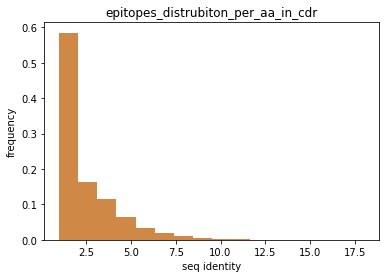

In [142]:
import matplotlib.pyplot as plt

import numpy as np
def plot_two_histograms(true,gen,title=None,num_bins=100,path=None,xlabel=None,ylabel=None):
    bins=np.histogram(np.hstack((true,gen)), bins=num_bins)[1]
    plt.hist(true,bins=bins,weights=np.ones(len(true))/len(true),alpha=0.7,label="True")
    plt.hist(gen,bins=bins,weights=np.ones(len(gen))/len(gen),alpha=0.7,label="Generated")
    #plt.legend(prop={'size': 10})
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    if path:
        plt.savefig(path)
        
    plt.show()
    
plot_two_histograms(update_num_lst,update_num_lst,"epitopes_distrubiton_per_aa_in_cdr",16,None, "seq identity","frequency")

In [25]:
update_num_lst = [x for x in num_lst if x >0]

In [136]:
len(update_num_lst)

29995

In [24]:
len(num_lst)

198544

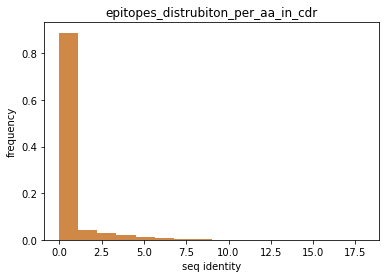

In [26]:
import matplotlib.pyplot as plt

import numpy as np
def plot_two_histograms(true,gen,title=None,num_bins=100,path=None,xlabel=None,ylabel=None):
    bins=np.histogram(np.hstack((true,gen)), bins=num_bins)[1]
    plt.hist(true,bins=bins,weights=np.ones(len(true))/len(true),alpha=0.7,label="True")
    plt.hist(gen,bins=bins,weights=np.ones(len(gen))/len(gen),alpha=0.7,label="Generated")
    #plt.legend(prop={'size': 10})
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    if path:
        plt.savefig(path)
        
    plt.show()
    
plot_two_histograms(num_lst,num_lst,"epitopes_distrubiton_per_aa_in_cdr",16,None, "seq identity","frequency")

In [27]:
table2.to_pickle("table2_updated_on_mar6.pkl")